In [1]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "__filename__ = " + "'" + decodeURIComponent(attribs['data-notebook-name'].value) + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [2]:
print(__filename__)

2D visualization of learning.ipynb


In [3]:
import os, sys, numpy as np, tensorflow as tf
from pathlib import Path

import time
try:
    print(__file__)
    __current_dir__ = str(Path(__file__).resolve().parents[0])
    __filename__ = os.path.basename(__file__)

except NameError:
    # jupyter notebook automatically sets the working 
    # directory to where the notebook is.
    __current_dir__ = str(Path(os.getcwd()))

module_parent_dir = str(Path(__current_dir__).resolve().parents[0])

sys.path.append(module_parent_dir)
import convnet_2_hidden

__package__ = 'convnet_2_hidden'
from . import network

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

BATCH_SIZE = 250
SCRIPT_DIR = __current_dir__
FILENAME = __filename__
SUMMARIES_DIR = SCRIPT_DIR
SAVE_PATH = SCRIPT_DIR + "/network.ckpt"

### configure devices for this eval script.
USE_DEVICE = '/gpu:2'
session_config = tf.ConfigProto(log_device_placement=True)
session_config.gpu_options.allow_growth = True
# this is required if want to use GPU as device.
# see: https://github.com/tensorflow/tensorflow/issues/2292
session_config.allow_soft_placement = True

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
if __name__ == "__main__":
    with tf.Graph().as_default() as g, tf.device(USE_DEVICE):
        # inference()
        input, hidden_2d, logits = network.inference()
        labels, loss_op = network.loss(logits)
        train = network.training(loss_op, 1e-1)
        eval = network.evaluation(logits, labels)

        init = tf.initialize_all_variables()

        with tf.Session(config=session_config) as sess:
            # Merge all the summaries and write them out to /tmp/mnist_logs (by default)
            # to see the tensor graph, fire up the tensorboard with --logdir="./train"
            merged = tf.merge_all_summaries()
            train_writer = tf.train.SummaryWriter(SUMMARIES_DIR + '/summaries/train', sess.graph)
            test_writer = tf.train.SummaryWriter(SUMMARIES_DIR + '/summaries/test')

            saver = tf.train.Saver()

            sess.run(init)
            saver.restore(sess, SAVE_PATH)

            # now let's test!
            TEST_BATCH_SIZE = np.shape(mnist.test.labels)[0]
            
            # while True:
            # saver.restore(sess, SAVE_PATH)
            output, loss_value, accuracy = sess.run([logits, loss_op, eval], feed_dict={
                input: mnist.test.images,
                labels: mnist.test.labels
            })
            print("- MNIST Test accuracy is ", accuracy / TEST_BATCH_SIZE)
            
            classification_2d = sess.run(hidden_2d, feed_dict={
                    input: mnist.test.images,
                    labels: mnist.test.labels
                })
            print(np.shape(classification_2d))
            # time.sleep(5.0)

- MNIST Test accuracy is  1.0
(10000, 2)


In [ ]:
# 1 run a batch through network,

In [9]:
np.shape(classification_2d)

(10000, 2)

In [11]:
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [12]:
import matplotlib.pyplot as plt

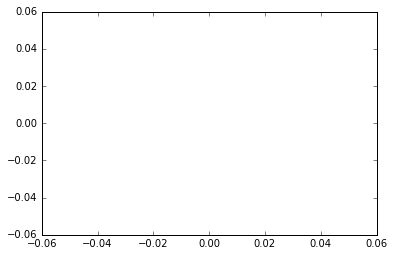

In [13]:
plt.scatter(classification_2d[:, 0], classification_2d[:, 1])

In [14]:
classification_2d[:, 0]

array([ nan,  nan,  nan, ...,  nan,  nan,  nan], dtype=float32)

In [17]:
output[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)